<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/SbRcpW).**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [23]:
data = pd.read_csv('../../data/titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [24]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
data.shape

(891, 11)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [15]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Minahan, Miss. Daisy E",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [26]:
d = {'female' : True, 'male' : False}
data['Female'] = data['Sex'].map(d)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [31]:
data['Female'].value_counts()

False    577
True     314
Name: Female, dtype: int64

In [34]:
len(data[(data['Female']==True) & (data['Survived']==1)])

233

In [49]:

data['CHILD'] = (data['Age'] < 18).astype('int')



**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [50]:
pd.crosstab(data['CHILD'], data['Survived'])

Survived,0,1
CHILD,,
0,497,281
1,52,61


In [5]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [52]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,RICH,CHILD
PassengerId,,,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,True,1.0,0
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,False,1.0,0
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,False,1.0,0
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,True,1.0,0
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,True,1.0,0


**Пример создания признака.**

In [54]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [55]:
age_categories = [age_category(age) for age in data.Age]

In [56]:
data['Age_category'] = age_categories

**Другой способ – через `apply`.**

In [10]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [62]:
# Ваш код здесь
female=len(data[data['Female']])
male=len(data[data['Female']==0])

print('Female=={} Male=={}'.format(female,male))
print('577 314')

Female==314 Male==577
577 314


In [189]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

In [194]:
# Ваш код здесь
len(data[(data['Pclass']==2) & (data['Female']==0)])
pd.crosstab(data['Pclass'], data['Sex'], margins=True)

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


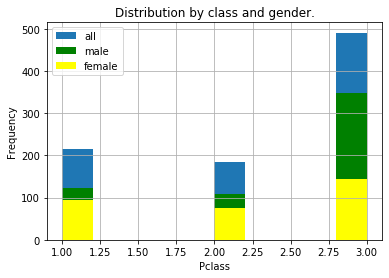

In [195]:
data['Pclass'].hist(label='all')
data[data['Sex'] == 'male']['Pclass'].hist(color="green", 
                                           label='male')
data[data['Sex'] == 'female']['Pclass'].hist(color="yellow", 
                                             label='female')
plt.title('Distribution by class and gender.')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.legend(loc='upper left');

**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [75]:
# Ваш код здесь
print(data['Fare'].median(),\
data['Fare'].std())

14.4542 49.693428597180905


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [206]:
# Ваш код здесь
#len(data[data['Age']<30])
#pd.crosstab(data['Age']<30, data['Survived'], normalize=True)
len(data[(data['Age']<30) & data['Survived']==1])/len(data[(data['Age']<30)])
len(data[(data['Age']>60) & data['Survived']==1])/len(data[(data['Age']>60)])
#print(40.6,22.7)

0.22727272727272727

In [208]:
young_survived = data.loc[data['Age'] < 30, 'Survived']
old_survived = data.loc[data['Age'] > 60, 'Survived']

print("Shares of survived people: \n\t  among young {}%, \n\t  among old {}%.".format(
    round(100 * young_survived.mean(), 1), 
        round(100 * old_survived.mean(), 1)))

Shares of survived people: 
	  among young 40.6%, 
	  among old 22.7%.


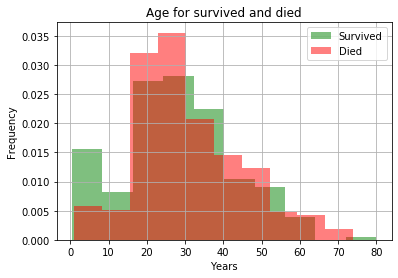

In [196]:
data[data['Survived'] == 1]['Age'].hist(color="green", 
                                         label='Survived', alpha=.5,
                                       density=True)
data[data['Survived'] == 0]['Age'].hist(color="red", 
                                         label='Died', alpha=.5,
                                       density=True)
plt.title('Age for survived and died')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.legend();

In [197]:
import seaborn as sns
sns.set()

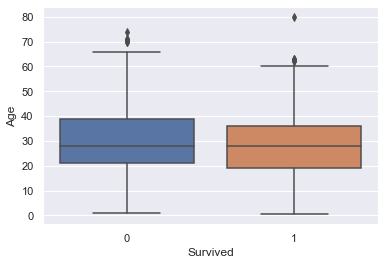

In [198]:
sns.boxplot(data['Survived'], data['Age']);

**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [90]:
# Ваш код здесь
len(data[(data['Female']==1) & data['Survived']==1])/len(data[(data['Female']==1) ])
len(data[(data['Female']==0) & data['Survived']==1])/len(data[(data['Female']==0) ])
print(18.9, 0.742)

0.18890814558058924

In [212]:
male_surv = data[data['Female']==0]['Survived']
female_surv = data[data['Female']==1]['Survived']
print(male_surv.mean(),\
female_surv.mean())

0.18890814558058924 0.7420382165605095


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [160]:
# Ваш код здесь
x= data['Name']
x = list(x)
b = list()
for a in x:
    b.append(a.split(' '))
d = list()

from itertools import chain
items = list(chain(*b))
from collections import Counter
Counter(items).most_common(5)
print('William', 62)


William 62


In [224]:
first_names = data.loc[data['Sex']=='male', 'Name'].apply(lambda name:
                                                     name.split(',')[1].split()[1])
first_names.value_counts().head()


William    35
John       25
George     14
Charles    13
Thomas     13
Name: Name, dtype: int64

**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

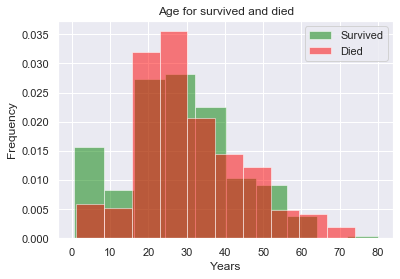

In [243]:
# Ваш код здесь
#data['Survived'].hist(by=data['Age'])
data[data['Survived'] == 1]['Age'].hist(color="green", 
                                         label='Survived', alpha=.5,
                                       density=True)
data[data['Survived'] == 0]['Age'].hist(color="red", 
                                         label='Died', alpha=.5,
                                       density=True)


plt.title('Age for survived and died')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.legend();

In [249]:
data[data['Survived'] == 1]['Fare'].hist(color="blue", 
                                         label='Survived', alpha=.25,
                                       density=True)
data[data['Survived'] == 0]['Fare'].hist(color="yellow", 
                                         label='Died', alpha=.25,
                                       density=True)
plt.title('Fare for survived and died')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend();

KeyError: 'Age'

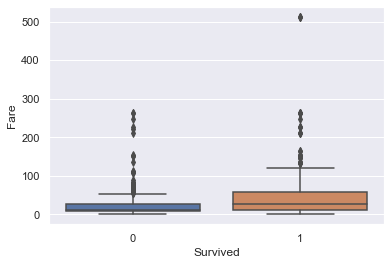

In [240]:
sns.boxplot(data['Survived'], data['Fare']);


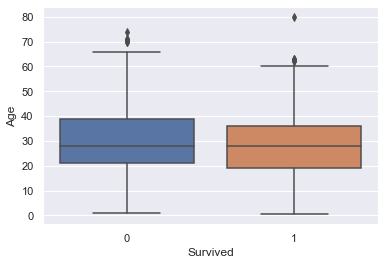

In [232]:
sns.boxplot(data['Survived'], data['Age']);

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [186]:
# Ваш код здесь
for x,y in zip((1,2),(2,3)):
    print(x,y)
    print(data['Age'][(data['Pclass']==x)].mean() > data['Age'][(data['Pclass']==y)].mean())

1 2
True
2 3
True


In [231]:
pd.crosstab(data['Pclass'], data['Sex'], 
            values=data['Age'], aggfunc=np.mean)

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


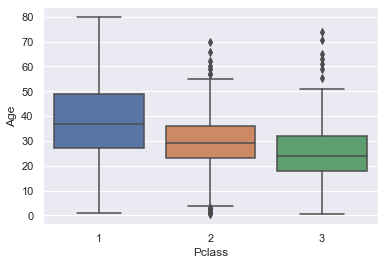

In [227]:
sns.boxplot(data['Pclass'], data['Age']);

##### В среднем мужчины 1-го класса старше 40 лет - True  Age             41.281386
#####  В среднем женщины 1-го класса старше 40 лет - False  Age              34.611765
##### Мужчины всех классов в среднем старше женщин того же класса True
##### 